# SUPERVISED CLASSIFICATION - kNN ALGORITHM

### GOAL: Show supervised classification on the example of kNN algorithm

In [1]:
# Import the necessary modules

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
n_neighbors = 15

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [3]:
h = .02

In [4]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#AAAAFF'])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

xx shape: (209, 209)


ValueError: x and y must be the same size

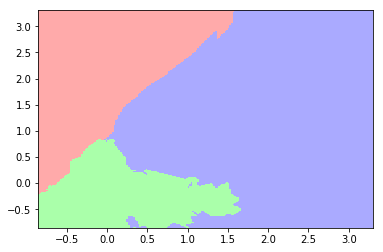

In [17]:
for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)
    
    x_min, x_max = X_train[:, 0].min() + 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 0].min() + 1, X_train[:, 0].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    print('xx shape:', xx.shape)
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    
    plt.scatter(X_train, y_train)

In [10]:
pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))

[[18  0  0]
 [ 0  9  1]
 [ 0 11  6]]


In [12]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.45      0.90      0.60        10
          2       0.86      0.35      0.50        17

avg / total       0.82      0.73      0.72        45

